# Quantrack Python crash course 11.

Content mostly refers to data visualization artifacts, but we’ll see that we can easily expand beyond the usual plots and graphs. Please try and apply it to your project dataset.

We use these plot commands on both synthetic data an titanic Data.

Notebook on MatplotLib and Seaborn commands

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+

In [5]:
import os 

print(os.getcwd())
print()

print('This is our current working directory')

/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets

This is our current working directory


In [6]:
#command to change the directory
os.chdir('/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets')
print(os.getcwd())

/Users/Cesar/Desktop/quantrack/qt_internal_training/python_course_beginners/data-sets


### The Data-Sets

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [7]:
df_ = pd.read_csv('titanic_data.csv')
df_.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data-Dictionary

* **survival** : Survival	- 0 = No, 1 = Yes  
* **pclass** :Ticket class	1-upper = 1st, 2-middle = 2nd, 3-lower = 3rd  
* **sex** : Sex	  
* **Age** :Age in years  	
* **sibsp** : # of siblings / spouses aboard the Titanic  	
* **parch** :# of parents / children aboard the Titanic  	
* **ticket** : Ticket number  	
* **fare** : Passenger fare  	
* **cabin** : Cabin number  	
* **embarked** : Port of Embarkation  

### 1. Basic Matplotlib commands
### 2. Histogram and Binnings 
### 3. Some other seaborn commands

The data-set set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. *Survived* columns should be seen as a label column.

## 1. Basic Matplotlib commands

In [8]:
import matplotlib.pyplot as plt
import numpy as np

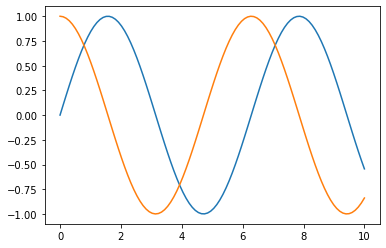

In [9]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

The plt.show() command does a lot under the hood, as it must interact with your system's interactive graphical backend. The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the plt.show() command should be used only once per Python session, and is most often seen at the very end of the script. Multiple show() commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

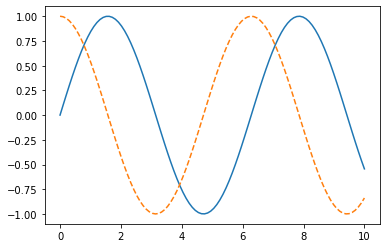

In [11]:
fig = plt.figure()

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#fig.savefig('my_figure.png')

#### Two - interfaces :

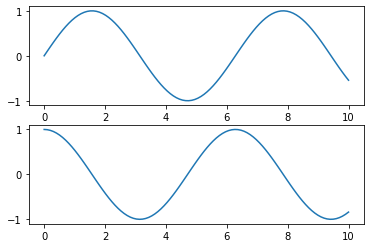

In [13]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is stateful: it keeps track of the "current" figure and axes, which are where all plt commands are applied. You can get a reference to these using the plt.gcf() (get current figure) and plt.gca() (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

## 2. Histogram and binnings :


A simple histogram can be a great first step in understanding a dataset. Earlier, we saw a preview of Matplotlib's histogram function (see Comparisons, Masks, and Boolean Logic), which creates a basic histogram in one line, once the normal boiler-plate imports are done:

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

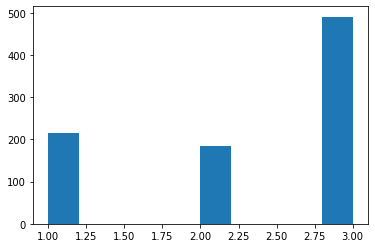

In [16]:
x = df_.Pclass

plt.hist(x)

The plt.hist docstring has more information on other customization options available. I find this combination of histtype='stepfilled' along with some transparency alpha to be very useful when comparing histograms of several distributions:

/Users/Cesar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/Users/Cesar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/Cesar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


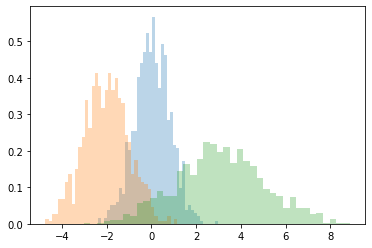

In [19]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, normed=True, bins=40);

### Two-dimensional histogram and binings 

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. We'll take a brief look at several ways to do this here. We'll start by defining some data—an x and y array drawn from a multivariate Gaussian distribution:

In [20]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

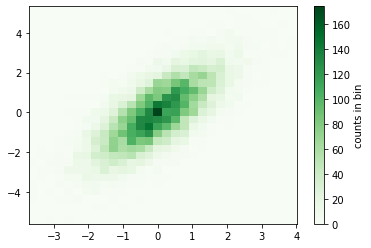

In [27]:
plt.hist2d(x, y, bins=30, cmap='Greens')
cb = plt.colorbar()
cb.set_label('counts in bin')

## 3. Seaborn plots :

 As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns:

In [28]:
import seaborn as sns
sns.set()

In [29]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

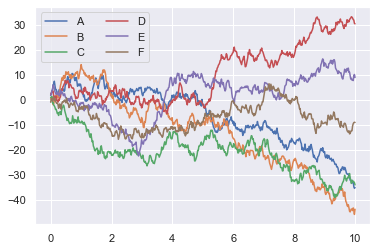

In [30]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Histograms - Kernel Density Plot - Densities

/Users/Cesar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


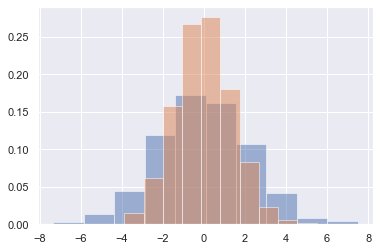

In [33]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot:

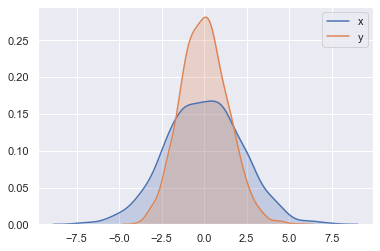

In [34]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

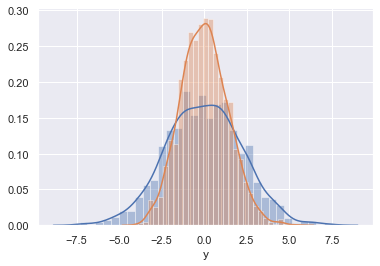

In [35]:
sns.distplot(data['x'])
sns.distplot(data['y']);

There are other parameters that can be passed using jointplot—for example, we can use a hexagonally based histogram instead:

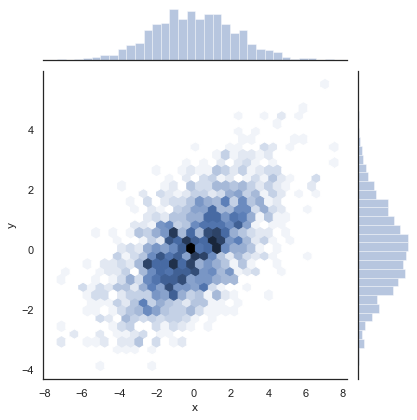

In [36]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Box Plot - Titanic Data

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are

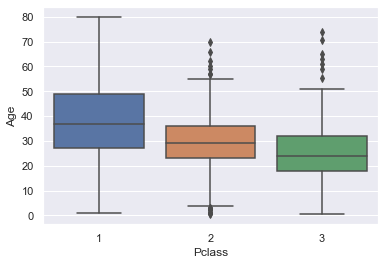

In [42]:
sns.boxplot(x='Pclass',y='Age',data=df_)

### Swarm plot - Titanic Data

A swarm plot is very similar to a strip plot, yet the locations of points are adjusted automatically to avoid overlap even if the jitter value is not applied.

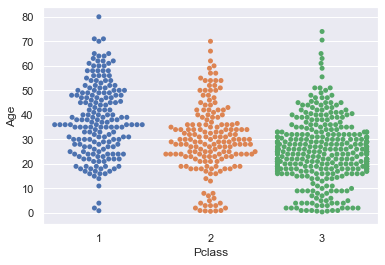

In [44]:
sns.swarmplot(x='Pclass',y='Age',data=df_)